In [1]:
#Reference : https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

#pd.pandas.set_option('display.max_rows',None) -- > Will show all the rows


import pandas as pd
import numpy as np
from IPython.display import display, Image

# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
# Scikit-learn packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Machine Learning packages
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor,ExtraTreesRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [4]:
dataset=pd.read_csv('drive/My Drive/Predict_Loan_Amount/train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(30000, 24)


#Pre-Processing

In [5]:
dataset.head(20)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,C-17688,Polly Crumpler,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,181.48,N,N,2.0,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,C-23855,Nathalie Olivier,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,697.67,Y,Y,2.0,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00
7,C-11006,Clarinda Montana,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,807.64,N,N,2.0,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
8,C-26934,Kenny Ankrom,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,155.95,N,Y,3.0,705.29,1,Active,241,1296.07,4,Rural,1,54903.44,22842.29
9,C-24944,Barbie Goetsch,M,18,1546.17,Low,Working,Laborers,Rural,42091.29,500.20,N,N,2.0,613.24,0,Unpossessed,883,1546.17,2,Urban,1,67993.43,0.00


###Removing spaces from column names and replacing by"_"

In [6]:
dataset.columns = dataset.columns.str.replace(' ', '_') # replacing space in column name with "_"
dataset.columns = dataset.columns.str.replace('(', '') #replacing "(" with blank in column name
dataset.columns = dataset.columns.str.replace(')', '')#replacing ")" with blank in column name

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


###Deleting the rows where Target varible(Loan_Sanction_Amount_USD) is "-999"

In [7]:
dataset = dataset[dataset.Loan_Sanction_Amount_USD != -999]

###Deleting the rows where Target varible(Loan_Sanction_Amount_USD) is "NaN"

In [8]:
dataset = dataset[~(dataset["Loan_Sanction_Amount_USD"].isnull()==True)]
dataset = dataset.reset_index(drop=True)

###Droping the columns which are not useful i.e. (['Customer_ID', 'Name','Property_ID']) 

In [9]:
dataset = dataset.drop(['Customer_ID', 'Name','Property_ID'], axis = 1)

###Now Checking the final shape of the dataset

In [10]:
dataset.shape


(29322, 21)

###Now replacing "-999" with NaN in the whole dataset

In [11]:
dataset=dataset.replace(-999,np.NaN)

#Now dropping the Property_Age:

In [12]:
dataset.drop("Property_Age",inplace=True,axis=1)

In [13]:
dataset.head()

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,4,Rural,1.0,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,2,Rural,1.0,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,2,Urban,0.0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,2,Semi-Urban,1.0,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,4,Semi-Urban,1.0,208567.91,74008.28


#**Train_Test Split**

In [97]:
#Similar distribution for train and test dataset

# Create the bins.  My `y` variable has
# 506 observations, and I want 50 bins.

bins = np.linspace(0, 506, 50)

# Save your Y values in a new ndarray,
# broken down by the bins created above.

y_binned = np.digitize(dataset['Loan_Sanction_Amount_USD'], bins)


X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['Loan_Sanction_Amount_USD'], test_size=0.2, stratify=y_binned)

In [98]:
X_train.shape, X_test.shape

((23457, 20), (5865, 20))

#**Feature Engineering**

###Missing values:
####Lets deal with Categorical data first:

In [99]:
features_nan_train=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes=='O'] # Making list of features having NaN values and is categorical

for feature in features_nan_train:
    print("{} has  {}%  of missing values".format(feature,np.round(X_train[feature].isnull().mean(),3)))

Gender has  0.002%  of missing values
Income_Stability has  0.056%  of missing values
Type_of_Employment has  0.243%  of missing values
Has_Active_Credit_Card has  0.05%  of missing values
Property_Location has  0.012%  of missing values


In [100]:

features_nan_test=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>1 and X_test[feature].dtypes=='O'] # Making list of features having NaN values and is categorical

for feature in features_nan_test:
    print("{} has  {}%  of missing values".format(feature,np.round(X_test[feature].isnull().mean(),3)))

Gender has  0.002%  of missing values
Income_Stability has  0.053%  of missing values
Type_of_Employment has  0.243%  of missing values
Has_Active_Credit_Card has  0.058%  of missing values
Property_Location has  0.011%  of missing values


In [101]:
## Replace missing value with a new label
def replace_categorical_feature(dataset,features_nan):
    dataset_copy=dataset.copy()
    dataset_copy[features_nan]=dataset_copy[features_nan].fillna('Missing')
    return dataset_copy

X_train=replace_categorical_feature(X_train,features_nan_train)
X_test=replace_categorical_feature(X_test,features_nan_test)


In [102]:
X_train[features_nan_train].isnull().sum()

Gender                    0
Income_Stability          0
Type_of_Employment        0
Has_Active_Credit_Card    0
Property_Location         0
dtype: int64

In [103]:
X_test[features_nan_test].isnull().sum()

Gender                    0
Income_Stability          0
Type_of_Employment        0
Has_Active_Credit_Card    0
Property_Location         0
dtype: int64

In [104]:
X_train.head()

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
11517,F,38,2234.30,Low,Working,Security staff,Semi-Urban,67897.04,344.72,N,N,4.0,736.39,0,Inactive,4,Rural,1.0,84242.29,0.00
25353,M,65,2547.30,High,Pensioner,Missing,Semi-Urban,152872.47,428.32,Y,N,2.0,795.74,0,Active,2,Rural,1.0,222289.36,107010.73
3115,M,40,NaN,Low,Commercial associate,Missing,Semi-Urban,82716.08,417.17,N,Y,3.0,716.47,0,Active,3,Rural,1.0,100353.00,53765.45
9720,F,49,2104.28,Low,Commercial associate,Laborers,Urban,38913.35,184.71,Y,Y,NaN,799.21,0,Inactive,4,Semi-Urban,1.0,69276.17,29185.01
28468,F,56,656.58,Low,Working,Cooking staff,Semi-Urban,22520.11,282.44,Y,Y,2.0,661.22,1,Inactive,2,Urban,1.0,37525.75,15764.08


In [105]:
X_test.head()

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_USD,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_USD
17595,M,30,2339.03,Low,Working,Laborers,Semi-Urban,86435.25,439.37,N,Y,4.0,687.06,0,Active,1,Semi-Urban,0.0,150609.71,0.00
12532,F,41,2622.02,Low,Commercial associate,Managers,Semi-Urban,111716.66,328.34,Y,N,2.0,824.48,0,Missing,3,Urban,1.0,196991.69,83787.50
16346,F,31,909.45,Low,Working,Medicine staff,Semi-Urban,15087.94,180.23,N,Y,2.0,832.26,0,Active,4,Rural,1.0,19485.64,12070.35
22970,M,27,1759.37,Low,Working,Missing,Rural,47005.12,216.27,N,Y,2.0,705.22,0,Unpossessed,4,Semi-Urban,1.0,78315.13,32903.58
10497,M,18,2480.17,Low,Working,Sales staff,Rural,49848.90,477.15,Y,Y,2.0,743.27,0,Inactive,3,Rural,1.0,85280.86,34894.23


####Now lets deal with Numerical Features with missing values:

####Train

In [106]:

numerical_with_nan_train=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes!='O'] #Making a list of Numerical features will Null Values.

for feature in numerical_with_nan_train:
    print("{} has  {}%  of missing values".format(feature,np.round(X_train[feature].isnull().mean(),3)))

Income_USD has  0.15%  of missing values
Current_Loan_Expenses_USD has  0.011%  of missing values
Dependents has  0.082%  of missing values
Credit_Score has  0.056%  of missing values
Co-Applicant has  0.006%  of missing values
Property_Price has  0.012%  of missing values


In [107]:
#Replacing the numerical Missing Values with Median values so that outliers dont have much impact

for feature in numerical_with_nan_train:
    #We will replace by using median since there are outliers
    median_value=X_train[feature].median()
    
    #Creating a new feature to capture nan values.
    X_train[feature+'nan']=np.where(X_train[feature].isnull(),1,0)
    X_train[feature].fillna(median_value,inplace=True)
    
X_train[numerical_with_nan_train].isnull().sum()
    

Income_USD                   0
Current_Loan_Expenses_USD    0
Dependents                   0
Credit_Score                 0
Co-Applicant                 0
Property_Price               0
dtype: int64

####Test

In [108]:
numerical_with_nan_test=[feature for feature in X_test.columns if X_test[feature].isnull().sum()>1 and X_test[feature].dtypes!='O']#Making a list of Numerical features will Null Values.

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan_test:
    print("{} has  {}%  of missing values".format(feature,np.around(X_test[feature].isnull().mean(),4)))

Income_USD has  0.1533%  of missing values
Current_Loan_Expenses_USD has  0.0128%  of missing values
Dependents has  0.0832%  of missing values
Credit_Score has  0.0558%  of missing values
Co-Applicant has  0.0051%  of missing values
Property_Price has  0.0101%  of missing values


In [109]:
#Replacing the numerical Missing Values with Median values so that outliers dont have much impact

for feature in numerical_with_nan_test:
    #We will replace by using median since there are outliers
    median_value=X_test[feature].median()
    
    #Creating a new feature to capture nan values.
    X_test[feature+'nan']=np.where(X_test[feature].isnull(),1,0)
    X_test[feature].fillna(median_value,inplace=True)
    
X_test[numerical_with_nan_test].isnull().sum()

Income_USD                   0
Current_Loan_Expenses_USD    0
Dependents                   0
Credit_Score                 0
Co-Applicant                 0
Property_Price               0
dtype: int64

####Handling Rare Categorical Feature

In [110]:
categorical_features_train=[feature for feature in X_train.columns if X_train[feature].dtype=='O'] # List of Categorical Variables.
categorical_features_train

['Gender',
 'Income_Stability',
 'Profession',
 'Type_of_Employment',
 'Location',
 'Expense_Type_1',
 'Expense_Type_2',
 'Has_Active_Credit_Card',
 'Property_Location']

In [111]:
for feature in categorical_features_train:
    Percentage_of_repeat=X_train.groupby(feature)['Loan_Sanction_Amount_USD'].count()/len(X_train) #Getting the % of repetetiveness of categories in feature.
    Not_Rare_df=Percentage_of_repeat[Percentage_of_repeat>0.01].index #If Percentage_of_repeat is greater than 1 % then it is not a Rare category otherwise "Rare"
    X_train[feature]=np.where(X_train[feature].isin(Not_Rare_df),X_train[feature],'Rare_var') # If the feature is having >1% of repeteviness then keep the same category otherwise replace it with "Rare"

####Test

In [112]:
categorical_features_test=[feature for feature in X_train.columns if X_test[feature].dtype=='O']
categorical_features_test

['Gender',
 'Income_Stability',
 'Profession',
 'Type_of_Employment',
 'Location',
 'Expense_Type_1',
 'Expense_Type_2',
 'Has_Active_Credit_Card',
 'Property_Location']

In [113]:
for feature in categorical_features_test:
    Percentage_of_repeat=X_test.groupby(feature)['Loan_Sanction_Amount_USD'].count()/len(X_test) #Getting the % of repetetiveness of categories in feature.
    Not_Rare_df=Percentage_of_repeat[Percentage_of_repeat>0.01].index #If Percentage_of_repeat is greater than 1 % then it is not a Rare category otherwise "Rare"
    X_test[feature]=np.where(X_test[feature].isin(Not_Rare_df),X_test[feature],'Rare_var') # If the feature is having >1% of repeteviness then keep the same category otherwise replace it with "Rare"


In [114]:
X_train.isnull().sum()*100/len(X_train)

Gender                          0.0
Age                             0.0
Income_USD                      0.0
Income_Stability                0.0
Profession                      0.0
Type_of_Employment              0.0
Location                        0.0
Loan_Amount_Request_USD         0.0
Current_Loan_Expenses_USD       0.0
Expense_Type_1                  0.0
Expense_Type_2                  0.0
Dependents                      0.0
Credit_Score                    0.0
No._of_Defaults                 0.0
Has_Active_Credit_Card          0.0
Property_Type                   0.0
Property_Location               0.0
Co-Applicant                    0.0
Property_Price                  0.0
Loan_Sanction_Amount_USD        0.0
Income_USDnan                   0.0
Current_Loan_Expenses_USDnan    0.0
Dependentsnan                   0.0
Credit_Scorenan                 0.0
Co-Applicantnan                 0.0
Property_Pricenan               0.0
dtype: float64

In [115]:
X_test.isnull().sum()*100/len(X_test)

Gender                          0.0
Age                             0.0
Income_USD                      0.0
Income_Stability                0.0
Profession                      0.0
Type_of_Employment              0.0
Location                        0.0
Loan_Amount_Request_USD         0.0
Current_Loan_Expenses_USD       0.0
Expense_Type_1                  0.0
Expense_Type_2                  0.0
Dependents                      0.0
Credit_Score                    0.0
No._of_Defaults                 0.0
Has_Active_Credit_Card          0.0
Property_Type                   0.0
Property_Location               0.0
Co-Applicant                    0.0
Property_Price                  0.0
Loan_Sanction_Amount_USD        0.0
Income_USDnan                   0.0
Current_Loan_Expenses_USDnan    0.0
Dependentsnan                   0.0
Credit_Scorenan                 0.0
Co-Applicantnan                 0.0
Property_Pricenan               0.0
dtype: float64

#Now lets add some more Features:


##**1) Loan_to_value_ratio :**

(https://www.bdc.ca/en/articles-tools/entrepreneur-toolkit/templates-business-guides/glossary/loan-to-value-ratio)

###As "Property_Price" and "Loan_Amount_Request_USD" have 0.96 collinearity.
###So we will create a new column which store the ratio of  Loan request amount and property price .

###And then we will remove "Property_Price" and "Loan_Amount_Request_USD" later

In [116]:
X_train["Loan_To_Value_Ratio"]=X_train['Loan_Amount_Request_USD']/X_train['Property_Price']

In [117]:
X_test["Loan_To_Value_Ratio"]=X_test['Loan_Amount_Request_USD']/X_test['Property_Price']

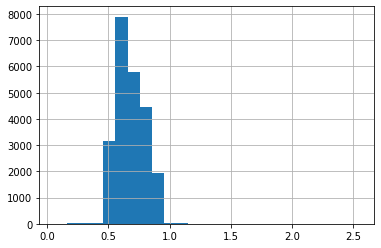

In [118]:
X_train_copy=X_train.copy()
X_train_copy["Loan_To_Value_Ratio"].hist(bins=25) # **Histogram of newly created feature : Loan_request_Actual**

##**2)Interest Rates:**

[Relation --> Credit_Score VS Interest Rate (CLICK HERE)](https://www.businessinsider.com/personal-finance/average-mortgage-interest-rate)


In [119]:
#Reference : https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def fun(row):
    if row['Credit_Score'] <620 :   #Poor credit
        val = 13
    elif row['Credit_Score'] >=620 and row['Credit_Score'] <=639 :
        val = 7.965
    elif row['Credit_Score'] >=640 and row['Credit_Score'] <=659 :
        val = 7.419
    elif row['Credit_Score'] >=660 and row['Credit_Score'] <=679 :
        val = 6.989
    elif row['Credit_Score'] >=680 and row['Credit_Score'] <=699 :
        val = 6.775
    elif row['Credit_Score'] >=700 and row['Credit_Score'] <=759 :
        val = 6.598

    else:
        val = 6.376
    return val

In [120]:
X_train['Interest_Rate'] = X_train.apply(fun, axis=1)
X_test['Interest_Rate'] = X_test.apply(fun, axis=1)

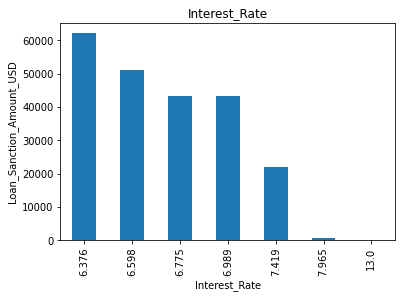

In [121]:
data=X_train.copy()
data.groupby("Interest_Rate")['Loan_Sanction_Amount_USD'].mean().plot.bar()
plt.xlabel("Interest_Rate")
plt.ylabel('Loan_Sanction_Amount_USD')
plt.title("Interest_Rate")
plt.show()

####**3) Actual_amount_individual_can_pay_monthly**

####**Actual_amount_individual_can_pay_monthly = 60% of the individual's monthly income**
and the rest 40% is take home salary

##**New feature : Actual_Term_Suitable : (Loan_Amount_Request_USD)/(Actual_amount_individual_can_pay_monthly)**
This will give us number of months that are suitable for the individual to pay back the loan.

In [122]:
X_train["Actual_Term_Suitable"] = X_train['Loan_Amount_Request_USD']/(0.60*X_train['Income_USD'])
X_test["Actual_Term_Suitable"] = X_test['Loan_Amount_Request_USD']/(0.60*X_test['Income_USD'])

In [123]:
X_train["Actual_Term_Suitable"] = X_train["Actual_Term_Suitable"].astype('int')
X_test["Actual_Term_Suitable"] = X_test["Actual_Term_Suitable"].astype('int')

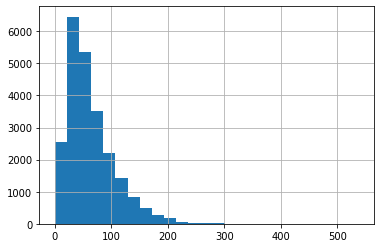

In [124]:
data=X_train.copy()
data["Actual_Term_Suitable"].hist(bins=25)

In [125]:
X_train["Actual_Term_Suitable"] = X_train["Actual_Term_Suitable"].replace([0],0.1)
X_test["Actual_Term_Suitable"] = X_test["Actual_Term_Suitable"].replace([0],0.1)

#3)**EMI:**

Reference :https://www.researchgate.net/publication/360415721_Loan_Prediction_System_Using_Machine_Learning

EMI = P * [( r * (1 + r)^n)) / ((1 + r)^n - 1)]

Lets assume that interest rate=15% 

The 2nd  step is to convert the annual rate of interest into a monthly one to find out the EMI level. If we divide 15% by 12 months, we get:
 r =(15/12) = 1.25%

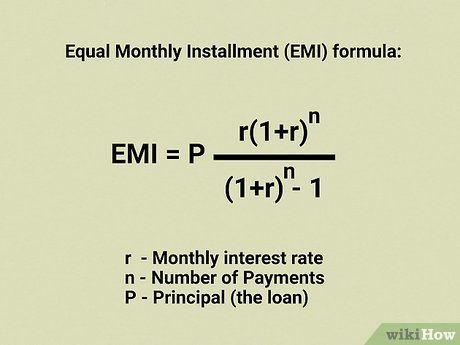

In [126]:
X_train['r']=(X_train['Interest_Rate']/12)/100
X_test['r']=(X_test['Interest_Rate']/12)/100

In [127]:
X_train["EMI"]=X_train.apply(lambda x:(x["Loan_Amount_Request_USD"]*x['r']*((1+x['r'])**x['Actual_Term_Suitable']))/(1+x['r'])**(x['Actual_Term_Suitable']-1),axis=1)
X_test["EMI"]=X_test.apply(lambda x:(x["Loan_Amount_Request_USD"]*x['r']*((1+x['r'])**x['Actual_Term_Suitable']))/(1+x['r'])**(x['Actual_Term_Suitable']-1),axis=1)

In [128]:
X_train.drop('r',inplace=True,axis=1)
X_test.drop('r',inplace=True,axis=1)

#**4)Additional Features**

Reference :https://www.analyticsvidhya.com/blog/2022/02/loan-approval-prediction-machine-learning/#h2_4  -->For some features 

In [129]:
# Mean of EMI depending on "Dependents"
X_train['Dependents_EMI_MEAN']=X_train.groupby(['Dependents'])['EMI'].transform('mean')

# Loan_Amount_Per_Total_Income
X_train['Loan_Amount_Per_Total_Income']=X_train['Loan_Amount_Request_USD']/X_train['Income_USD']

#EMI_Per_Loan_Amount
X_train['EMI_Per_Loan_Amount']=X_train['EMI']/X_train['Loan_Amount_Request_USD']

#Mean of Loan Amount Requested depending on "Dependents"
X_train['Dependent_Loan_Amount_AVG']=X_train.groupby(['Dependents'])['Loan_Amount_Request_USD'].transform('mean')


In [130]:
# Mean of EMI depending on "Dependents"
X_test['Dependents_EMI_MEAN']=X_test.groupby(['Dependents'])['EMI'].transform('mean')

# Loan_Amount_Per_Total_Income
X_test['Loan_Amount_Per_Total_Income']=X_test['Loan_Amount_Request_USD']/X_test['Income_USD']

#EMI_Per_Loan_Amount
X_test['EMI_Per_Loan_Amount']=X_test['EMI']/X_test['Loan_Amount_Request_USD']

#Mean of Loan Amount depending on "Dependents"
X_test['Dependent_Loan_Amount_AVG']=X_test.groupby(['Dependents'])['Loan_Amount_Request_USD'].transform('mean')

#**5) Bin features:**

In [131]:
X_train['Income_USD_Bins'] = pd.qcut(X_train['Income_USD'], 6, labels=False)
X_train['Current_Loan_Expenses_USD_bins'] = pd.qcut(X_train['Current_Loan_Expenses_USD'], 9, labels=False)

In [132]:
X_test['Income_USD_Bins'] = pd.qcut(X_test['Income_USD'], 6, labels=False)
X_test['Current_Loan_Expenses_USD_bins'] = pd.qcut(X_test['Current_Loan_Expenses_USD'], 9, labels=False)

#**Dropping the Loan_amount_Request_USD and Property_Price as we have already created new feature "Loan_to_value_ratio"**

In [133]:
X_train.drop('Loan_Amount_Request_USD',axis=1,inplace=True)
X_test.drop('Loan_Amount_Request_USD',axis=1,inplace=True)

X_train.drop('Property_Price',axis=1,inplace=True)
X_test.drop('Property_Price',axis=1,inplace=True)


###Taking Log transformation of "Actual_Term_Suitable" feature
Since 1 numerical variables are skewed we will perform log transformation

In [134]:
import numpy as np
num_features=['Actual_Term_Suitable']

for feature in num_features:
    X_train[feature]=np.log(X_train[feature])

for feature in num_features:
    X_test[feature]=np.log(X_test[feature])

In [135]:
X_train.head()

,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Current_Loan_Expenses_USD,Expense_Type_1,Expense_Type_2,Dependents,Credit_Score,No._of_Defaults,Has_Active_Credit_Card,Property_Type,Property_Location,Co-Applicant,Loan_Sanction_Amount_USD,Income_USDnan,Current_Loan_Expenses_USDnan,Dependentsnan,Credit_Scorenan,Co-Applicantnan,Property_Pricenan,Loan_To_Value_Ratio,Interest_Rate,Actual_Term_Suitable,EMI,Dependents_EMI_MEAN,Loan_Amount_Per_Total_Income,EMI_Per_Loan_Amount,Dependent_Loan_Amount_AVG,Income_USD_Bins,Current_Loan_Expenses_USD_bins
11517,F,38,2234.30,Low,Working,Security staff,Semi-Urban,344.72,N,N,4.0,736.39,0,Inactive,4,Rural,1.0,0.00,0,0,0,0,0,0,0.805973,6.598,3.912023,375.373199,506.883722,30.388506,0.005529,88144.531008,3,3
25353,M,65,2547.30,High,Pensioner,Missing,Semi-Urban,428.32,Y,N,2.0,795.74,0,Active,2,Rural,1.0,107010.73,0,0,0,0,0,0,0.687718,6.376,4.605170,816.578211,527.211705,60.013532,0.005342,92964.338836,4,5
3115,M,40,2223.60,Low,Commercial associate,Missing,Semi-Urban,417.17,N,Y,3.0,716.47,0,Active,3,Rural,1.0,53765.45,1,0,0,0,0,0,0.824251,6.598,4.110874,457.301225,514.675121,37.199173,0.005529,89084.703325,2,5
9720,F,49,2104.28,Low,Commercial associate,Laborers,Urban,184.71,Y,Y,2.0,799.21,0,Inactive,4,Semi-Urban,1.0,29185.01,0,0,1,0,0,0,0.561713,6.376,3.401197,207.858182,527.211705,18.492477,0.005342,92964.338836,2,1
28468,F,56,656.58,Low,Working,Cooking staff,Semi-Urban,282.44,Y,Y,2.0,661.22,1,Inactive,2,Urban,1.0,15764.08,0,0,0,0,0,0,0.600124,6.989,4.043051,131.924777,527.211705,34.299111,0.005858,92964.338836,0,2


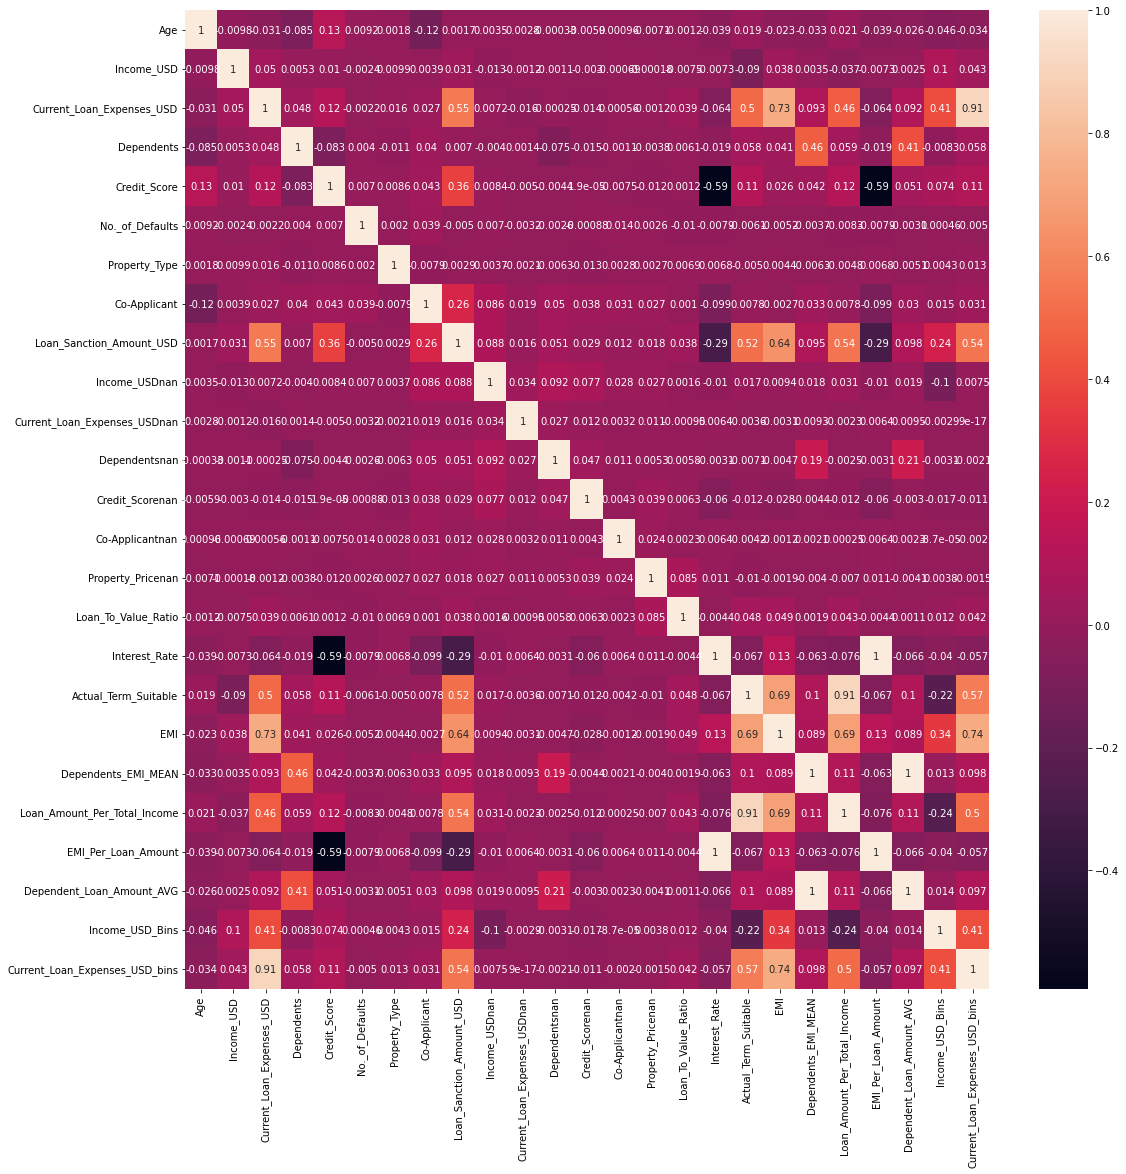

In [136]:
numerical_features = [feature for feature in X_train.columns if X_train[feature].dtypes != 'O']
# Heatmap linear correlation between numerical variables
plt.figure(figsize=(18, 18))
sns.heatmap(X_train[numerical_features].corr(), annot=True)
plt.show()

# 4 Additional features are not useful so dropping those features (Or with high correlation >0.9)

In [137]:
X_train.drop('Dependents_EMI_MEAN',axis=1,inplace=True)
X_train.drop('EMI_Per_Loan_Amount',axis=1,inplace=True)
X_train.drop('Loan_Amount_Per_Total_Income',axis=1,inplace=True)
X_train.drop('Current_Loan_Expenses_USD_bins',axis=1,inplace=True)



X_test.drop('Dependents_EMI_MEAN',axis=1,inplace=True)
X_test.drop('EMI_Per_Loan_Amount',axis=1,inplace=True)
X_test.drop('Loan_Amount_Per_Total_Income',axis=1,inplace=True)
X_test.drop('Current_Loan_Expenses_USD_bins',axis=1,inplace=True)

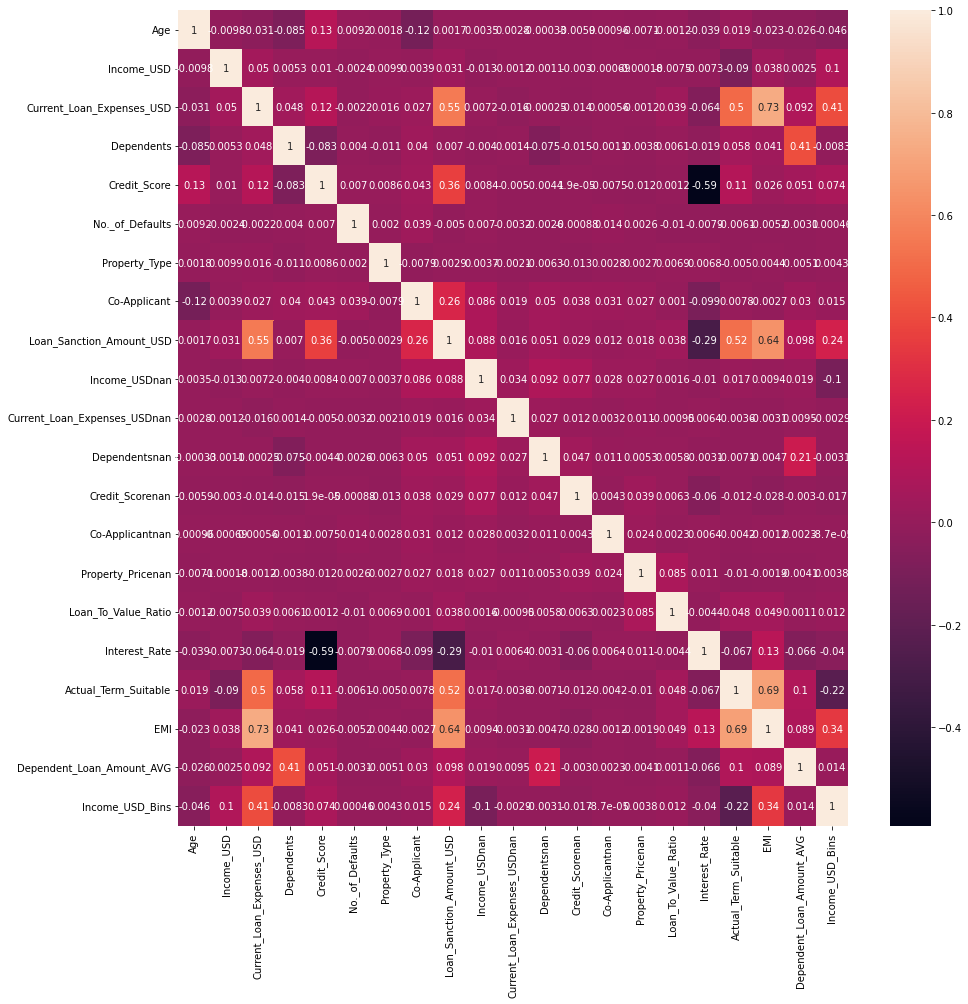

In [138]:
numerical_features = [feature for feature in X_train.columns if X_train[feature].dtypes != 'O']
# Heatmap linear correlation between numerical variables
plt.figure(figsize=(15, 15))
sns.heatmap(X_train[numerical_features].corr(), annot=True)
plt.show()

In [139]:
X_train = X_train.drop(['Loan_Sanction_Amount_USD'], axis=1)

X_test = X_test.drop(['Loan_Sanction_Amount_USD'], axis=1)

#Applying OHE on categorical data and then normalizing the data.

In [140]:
X_train.dtypes

Gender                           object
Age                               int64
Income_USD                      float64
Income_Stability                 object
Profession                       object
Type_of_Employment               object
Location                         object
Current_Loan_Expenses_USD       float64
Expense_Type_1                   object
Expense_Type_2                   object
Dependents                      float64
Credit_Score                    float64
No._of_Defaults                   int64
Has_Active_Credit_Card           object
Property_Type                     int64
Property_Location                object
Co-Applicant                    float64
Income_USDnan                     int64
Current_Loan_Expenses_USDnan      int64
Dependentsnan                     int64
Credit_Scorenan                   int64
Co-Applicantnan                   int64
Property_Pricenan                 int64
Loan_To_Value_Ratio             float64
Interest_Rate                   float64


In [141]:
scaler = MinMaxScaler()

num_col =[feature for feature in X_train.columns if  X_train[feature].dtypes!='O' and feature not in ['Loan_Sanction_Amount_USD']]

# Normalizing numerical columns
scaler_fit = scaler.fit(X_train[num_col])
X_train[num_col] = scaler_fit.transform(X_train[num_col])
X_test[num_col] = scaler_fit.transform(X_test[num_col])

In [142]:
ohe = OneHotEncoder()
cat_col = [feature for feature in X_train.columns if  X_train[feature].dtypes=='O']

# Encoding the categorical columns
for cat in cat_col:
    label_fit = ohe.fit(np.array(X_train[cat]).reshape(-1, 1))

    train_transformed = label_fit.transform(np.array(X_train[cat]).reshape(-1, 1))
    X_train[ohe.categories_[0]]=train_transformed.toarray()

    test_transformed= label_fit.transform(np.array(X_test[cat]).reshape(-1, 1))
    X_test[ohe.categories_[0]]=test_transformed.toarray()

In [143]:
X_train.drop(cat_col,axis=1,inplace=True)
X_test.drop(cat_col,axis=1,inplace=True)

In [144]:
X_train

,Age,Income_USD,Current_Loan_Expenses_USD,Dependents,Credit_Score,No._of_Defaults,Property_Type,Co-Applicant,Income_USDnan,Current_Loan_Expenses_USDnan,Dependentsnan,Credit_Scorenan,Co-Applicantnan,Property_Pricenan,Loan_To_Value_Ratio,Interest_Rate,Actual_Term_Suitable,EMI,Dependent_Loan_Amount_AVG,Income_USD_Bins,F,M,Rare_var,High,Low,Missing,Commercial associate,Pensioner,State servant,Working,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Private service staff,Sales staff,Security staff,Rural,Semi-Urban,Urban,N,Y,Active,Inactive,Unpossessed
11517,0.425532,0.001045,0.081679,0.230769,0.494498,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299538,0.033514,0.723433,0.100708,0.368477,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25353,1.000000,0.001221,0.103637,0.076923,0.682160,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251903,0.000000,0.804121,0.230346,0.521009,0.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3115,0.468085,0.001039,0.100709,0.153846,0.431512,0.0,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.306901,0.033514,0.746581,0.124781,0.398231,0.4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9720,0.659574,0.000972,0.039649,0.076923,0.693132,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.201146,0.000000,0.663968,0.051488,0.521009,0.4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
28468,0.808511,0.000157,0.065320,0.076923,0.256814,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216618,0.092542,0.738686,0.029176,0.521009,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0.553191,0.000546,0.045397,0.230769,0.593625,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228030,0.000000,0.663968,0.029503,0.368477,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
10857,0.765957,0.001349,0.099301,0.076923,0.413331,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314483,0.033514,0.748474,0.160288,0.521009,0.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
26476,0.234043,0.000509,0.050907,0.076923,0.317840,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264177,0.060236,0.663968,0.030130,0.521009,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8820,0.510638,0.001440,0.100005,0.000000,0.215424,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192315,0.157458,0.610798,0.053471,0.000000,0.8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [145]:
X_test

,Age,Income_USD,Current_Loan_Expenses_USD,Dependents,Credit_Score,No._of_Defaults,Property_Type,Co-Applicant,Income_USDnan,Current_Loan_Expenses_USDnan,Dependentsnan,Credit_Scorenan,Co-Applicantnan,Property_Pricenan,Loan_To_Value_Ratio,Interest_Rate,Actual_Term_Suitable,EMI,Dependent_Loan_Amount_AVG,Income_USD_Bins,F,M,Rare_var,High,Low,Missing,Commercial associate,Pensioner,State servant,Working,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Private service staff,Sales staff,Security staff,Rural,Semi-Urban,Urban,N,Y,Active,Inactive,Unpossessed
17595,0.255319,0.001104,0.106540,0.230769,0.338519,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206056,0.060236,0.746581,0.134610,0.388425,0.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
12532,0.489362,0.001263,0.077376,0.076923,0.773035,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203321,0.000000,0.764252,0.165752,0.532568,0.8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
16346,0.276596,0.000299,0.038473,0.076923,0.797635,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286784,0.000000,0.651703,0.014094,0.532568,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
22970,0.191489,0.000777,0.047939,0.076923,0.395940,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216651,0.033514,0.708552,0.066770,0.532568,0.2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
10497,0.000000,0.001183,0.116463,0.076923,0.516252,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210335,0.033514,0.675063,0.071390,0.532568,0.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28953,0.000000,0.001978,0.167048,0.153846,0.507320,0.0,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.193877,0.033514,0.821398,0.433911,0.342713,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15585,0.127660,0.000829,0.085148,0.153846,0.541074,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265031,0.033514,0.750336,0.105035,0.342713,0.2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
52,0.063830,0.000904,0.117078,0.076923,0.618384,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.280201,0.000000,0.772174,0.133014,0.532568,0.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
15788,0.638298,0.002639,0.114559,0.153846,0.599981,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194675,0.000000,0.678538,0.156869,0.342713,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


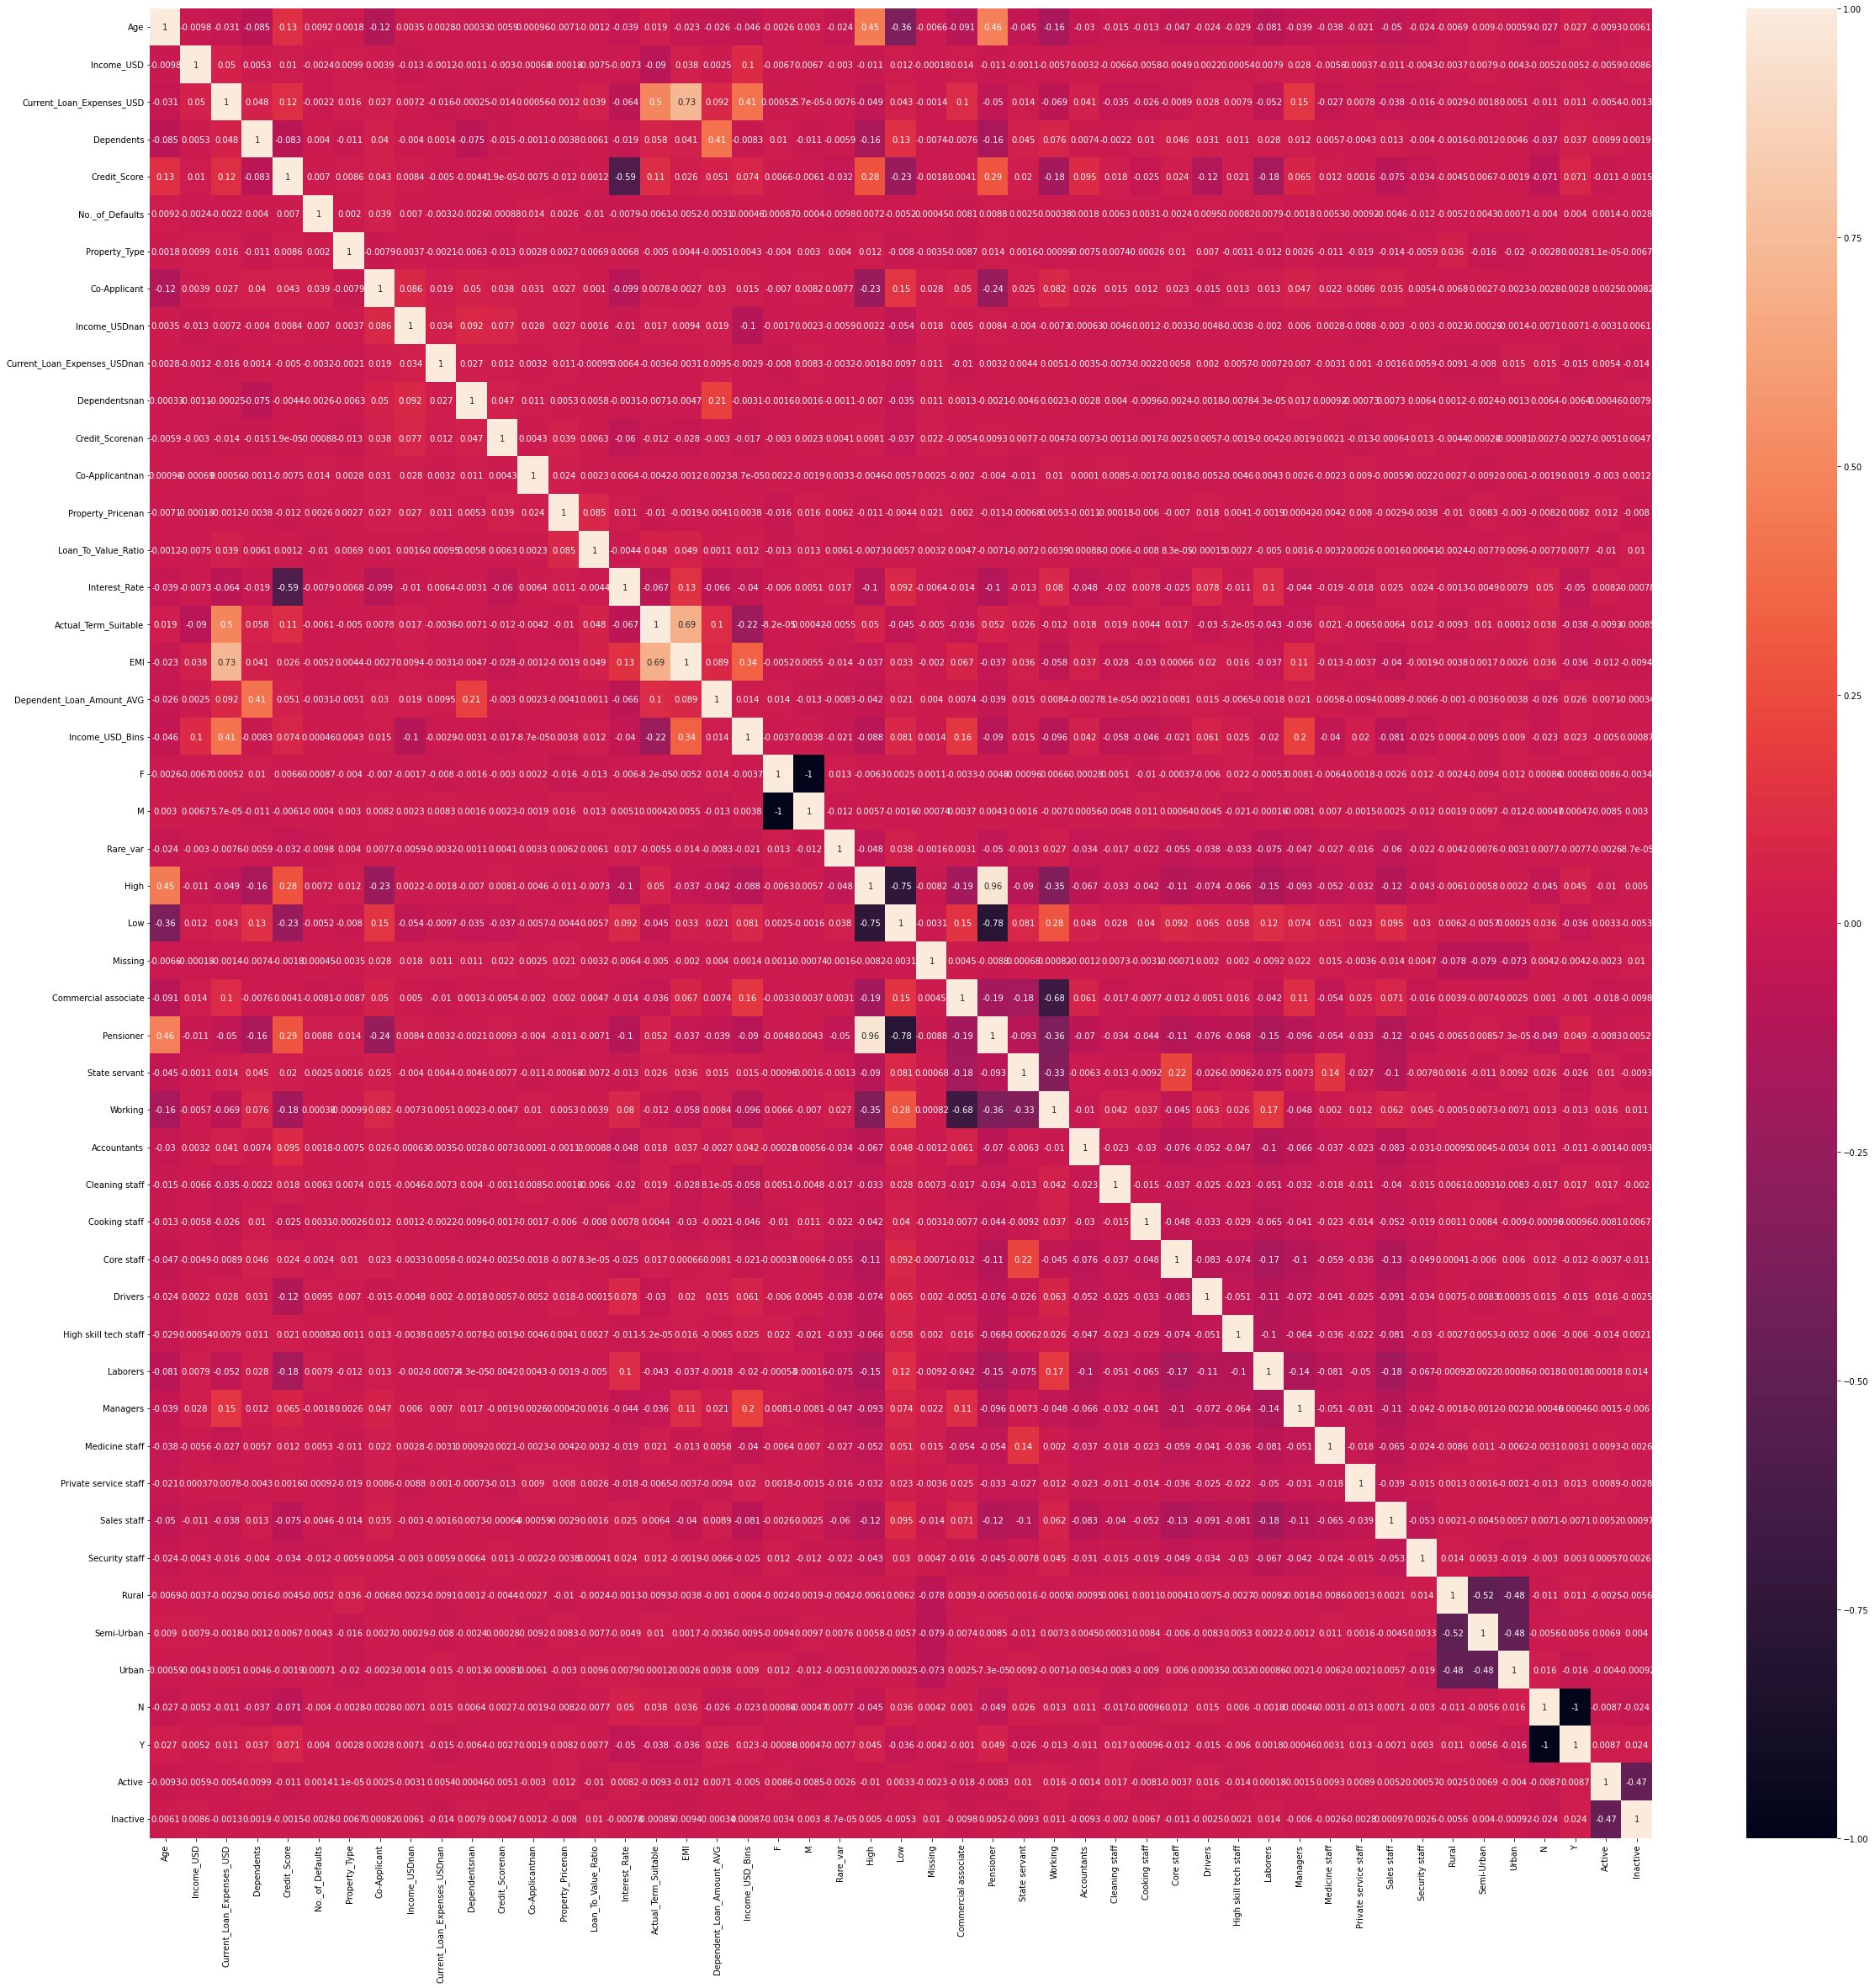

In [146]:
import seaborn as sns
corr=X_train.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(40,40))
sns.heatmap(X_train[top_features].corr(),annot=True)

In [64]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
threshold=0.80
correlation(X_train.iloc[:,:-1],threshold)

{'M', 'Pensioner', 'Y'}

In [147]:
X_train.drop("Pensioner",axis=1,inplace=True)
X_train.drop("M",axis=1,inplace=True)

In [148]:
X_test.drop("Pensioner",axis=1,inplace=True)
X_test.drop("M",axis=1,inplace=True)

In [149]:
X_train.drop("Y",axis=1,inplace=True)
X_test.drop("Y",axis=1,inplace=True)


#RFE(Recursive Feature elimination)

In [ ]:
from sklearn.feature_selection import RFE
model =RandomForestRegressor(n_estimators = 1000, n_jobs=-1)
selector = RFE(model, n_features_to_select=25, step=1)# Selecting Top 25 features
selector = selector.fit(X_train, y_train)

In [ ]:
ranking = selector.ranking_
ranking=list(ranking)
print(ranking)

[1, 1, 1, 1, 1, 1, 1, 1, 11, 23, 18, 17, 20, 22, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 21, 1, 10, 4, 8, 19, 16, 6, 5, 7, 1, 14, 12, 9, 3, 13, 2, 1, 1, 1, 1, 1, 1]


In [ ]:
filter = selector.support_
print(filter)

[ True  True  True  True  True  True  True  True False False False False
 False False  True  True  True  True  True  True  True False  True  True
 False  True False False False False False False False False  True False
 False False False False False  True  True  True  True  True  True]


In [ ]:
features_to_select=X_train.columns.tolist()

new_list=[]
for i in range(len(ranking)):
  if ranking[i]==1:
    new_list.append(features_to_select[i])

X_new = X_train[X_train.columns.intersection(new_list)]
X_new


,Age,Income_USD,Current_Loan_Expenses_USD,Dependents,Credit_Score,No._of_Defaults,Property_Type,Co-Applicant,Loan_To_Value_Ratio,Interest_Rate,Actual_Term_Suitable,EMI,Dependent_Loan_Amount_AVG,Income_USD_Bins,F,High,Low,Commercial associate,Laborers,Semi-Urban,Urban,N,Active,Inactive,Unpossessed
27501,0.744681,0.000356,0.089830,0.153846,0.354550,0.0,0.333333,1.0,0.210778,0.060236,0.757502,0.058364,0.362833,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
14721,0.297872,0.001768,0.101013,0.153846,0.438405,0.0,0.333333,1.0,0.227815,0.033514,0.681913,0.113595,0.362833,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11415,0.170213,0.000571,0.187297,0.076923,0.842377,0.0,0.666667,1.0,0.680487,0.000000,0.895374,0.277938,0.500855,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17827,0.765957,0.000468,0.048260,0.076923,0.329318,1.0,0.000000,1.0,0.347148,0.060236,0.810904,0.119704,0.500855,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11747,0.978723,0.001474,0.114586,0.076923,0.888699,0.0,0.000000,1.0,0.277353,0.000000,0.703137,0.111055,0.500855,0.8,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,0.000000,0.000843,0.053564,0.000000,0.355878,0.0,0.000000,1.0,0.257225,0.060236,0.708552,0.074649,0.000000,0.2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
11893,0.574468,0.001381,0.140045,0.076923,0.645924,1.0,0.666667,1.0,0.301324,0.000000,0.789240,0.225466,0.500855,0.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16803,0.382979,0.003531,0.139993,0.076923,0.522197,0.0,0.333333,1.0,0.308796,0.033514,0.721081,0.313511,0.500855,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15673,0.404255,0.002294,0.179472,0.076923,0.512079,0.0,0.333333,1.0,0.213295,0.033514,0.757502,0.281988,0.500855,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_new.columns

Index(['Age', 'Income_USD', 'Current_Loan_Expenses_USD', 'Dependents',
       'Credit_Score', 'No._of_Defaults', 'Property_Type', 'Co-Applicant',
       'Loan_To_Value_Ratio', 'Interest_Rate', 'Actual_Term_Suitable', 'EMI',
       'Dependent_Loan_Amount_AVG', 'Income_USD_Bins', 'F', 'High', 'Low',
       'Commercial associate', 'Laborers', 'Semi-Urban', 'Urban', 'N',
       'Active', 'Inactive', 'Unpossessed'],
      dtype='object')

In [ ]:
test_df_new=X_test[X_test.columns.intersection(new_list)]
test_df_new

,Age,Income_USD,Current_Loan_Expenses_USD,Dependents,Credit_Score,No._of_Defaults,Property_Type,Co-Applicant,Loan_To_Value_Ratio,Interest_Rate,Actual_Term_Suitable,EMI,Dependent_Loan_Amount_AVG,Income_USD_Bins,F,High,Low,Commercial associate,Laborers,Semi-Urban,Urban,N,Active,Inactive,Unpossessed
26039,1.000000,0.000245,0.032507,0.076923,0.832701,0.0,1.000000,0.0,0.200882,0.000000,0.782431,0.054540,0.535055,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
24900,1.000000,0.000776,0.078740,0.076923,0.854898,0.0,1.000000,0.0,0.234572,0.000000,0.816269,0.174994,0.535055,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18256,0.000000,0.000298,0.020382,0.076923,0.550149,0.0,0.333333,1.0,0.199147,0.033514,0.703137,0.027955,0.535055,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
12498,0.319149,0.001038,0.154992,0.076923,0.649877,1.0,0.333333,1.0,0.270439,0.000000,0.805279,0.201940,0.535055,0.4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
28391,0.510638,0.000942,0.138201,0.076923,0.556156,1.0,0.000000,1.0,0.236314,0.033514,0.844940,0.274650,0.535055,0.4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,0.127660,0.001038,0.105024,0.076923,0.506292,0.0,0.333333,1.0,0.346092,0.033514,0.762601,0.142713,0.535055,0.4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29106,0.148936,0.001038,0.025115,0.000000,0.111206,0.0,0.666667,1.0,0.323857,1.000000,0.616769,0.079438,0.038664,0.4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
18434,0.787234,0.001389,0.063538,0.230769,0.463226,0.0,0.666667,1.0,0.206611,0.033514,0.647310,0.064925,0.214691,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15296,0.000000,0.000745,0.090075,0.076923,0.645197,1.0,0.666667,1.0,0.330909,0.000000,0.813080,0.163887,0.535055,0.2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


#Parameter : R2 Score 

In [ ]:
from sklearn.linear_model import LinearRegression
def model_experimentation(models, X_train, y_train,X_test,y_test):
    '''
    Getting Train and CV Score using Machine Learning models without performing hyperparameter tuning
    '''
    #model_cv = {}
    model_test = {}
    model_train = {}
    model_fit={}
    for name, model in models.items():
      print(name)
      model.fit(X_train, y_train)
      model_fit[name]=model
      model_preds_train = model.predict(X_train)
      model_train[name] = r2_score(y_train, model_preds_train)
      model_preds_test= model.predict(X_test)
      model_test[name] = r2_score(y_test, model_preds_test)

    return model_fit,model_test, model_train

In [74]:
models = {
         
          
          'Lasso' :Lasso(alpha=1.0),
          'Elastic_net':ElasticNet(alpha=1.0, l1_ratio=0.5),
          'ADA': AdaBoostRegressor(),
          'Ridge' : Ridge(alpha=0.08),
          'XGB': xgb.XGBRegressor(),
          'CAT': CatBoostRegressor(),
          'RF': RandomForestRegressor(),
          'LR' : LinearRegression()

         }

In [ ]:
models_fit,test_score,train_score=model_experimentation(models,X_new,y_train,test_df_new,y_test)

Lasso
Elastic_net
ADA
Ridge
XGB
[02:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CAT
Learning rate set to 0.067404
0:	learn: 46138.2472423	total: 6.61ms	remaining: 6.6s
1:	learn: 44077.2639019	total: 12.7ms	remaining: 6.31s
2:	learn: 42137.8576168	total: 18.5ms	remaining: 6.16s
3:	learn: 40412.7154587	total: 25.4ms	remaining: 6.33s
4:	learn: 38841.8737092	total: 31.9ms	remaining: 6.36s
5:	learn: 37416.3183128	total: 38.1ms	remaining: 6.32s
6:	learn: 36038.6811034	total: 44ms	remaining: 6.24s
7:	learn: 34781.6274662	total: 50.2ms	remaining: 6.22s
8:	learn: 33620.2165421	total: 56.3ms	remaining: 6.2s
9:	learn: 32539.4504820	total: 62.4ms	remaining: 6.17s
10:	learn: 31559.5904453	total: 68.4ms	remaining: 6.15s
11:	learn: 30712.0683076	total: 74.4ms	remaining: 6.13s
12:	learn: 29920.7948666	total: 80.7ms	remaining: 6.12s
13:	learn: 29171.7148186	total: 86.9ms	remaining: 6.12s
14:	learn: 28475.6247336	total: 93.2m

In [ ]:
train_score

{'Lasso': 0.6315439440584888,
 'Elastic_net': 0.10623036904300776,
 'ADA': 0.5332044857244559,
 'Ridge': 0.6315545417726631,
 'XGB': 0.7949385770589166,
 'CAT': 0.8855663084043252,
 'RF': 0.9695665352070802,
 'LR': 0.631554805007432}

In [ ]:
test_score

{'Lasso': 0.6215451871502541,
 'Elastic_net': 0.10554355897949552,
 'ADA': 0.5213188257802526,
 'Ridge': 0.6215871564340729,
 'XGB': 0.779562762748494,
 'CAT': 0.8000174957834758,
 'RF': 0.800157689164313,
 'LR': 0.6215738346557732}

Text(0.5, 1.0, 'Feature Importance')

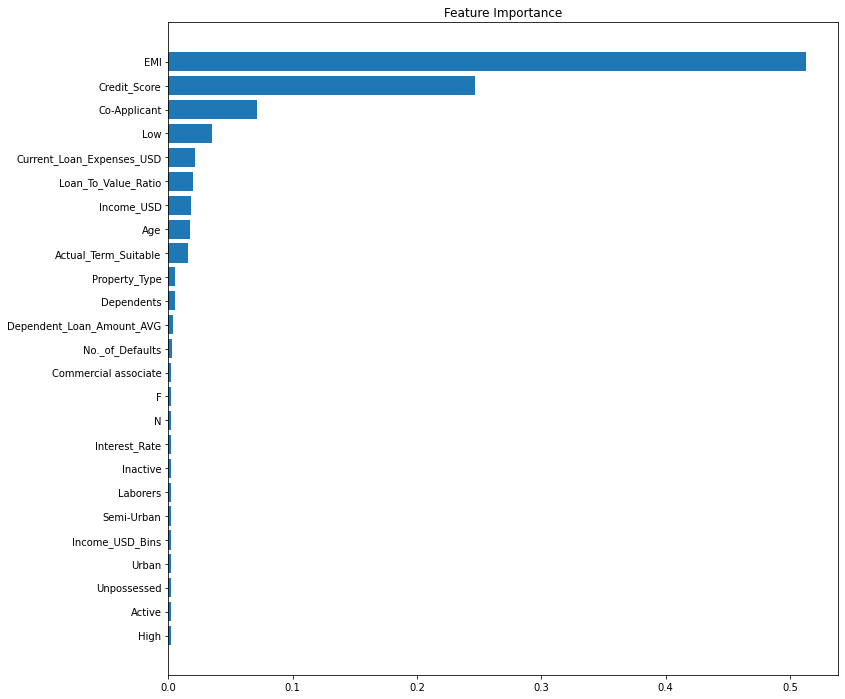

In [ ]:
feature_importance = models_fit['RF'].feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_new.columns)[sorted_idx])
plt.title('Feature Importance')

#Parameter : Mean_Absolute_Error

In [73]:
from sklearn.linear_model import LinearRegression
def model_experimentation(models, X_train, y_train,X_test,y_test):
    '''
    Getting Train and CV Score using Machine Learning models without performing hyperparameter tuning
    '''
    #model_cv = {}
    model_test = {}
    model_train = {}
    model_fit={}
    for name, model in models.items():
      print(name)
      model.fit(X_train, y_train)
      model_fit[name]=model
      model_preds_train = model.predict(X_train)
      model_train[name] = mean_absolute_error(y_train, model_preds_train)
      model_preds_test= model.predict(X_test)
      model_test[name] = mean_absolute_error(y_test, model_preds_test)

    return model_fit,model_test, model_train

In [75]:
models_fit,test_score,train_score=model_experimentation(models,X_new,y_train,test_df_new,y_test)

Lasso
Elastic_net
ADA
Ridge
XGB
[23:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CAT
Learning rate set to 0.067404
0:	learn: 46144.8829194	total: 61.3ms	remaining: 1m 1s
1:	learn: 44074.5182552	total: 69.2ms	remaining: 34.5s
2:	learn: 42124.6093108	total: 75.2ms	remaining: 25s
3:	learn: 40371.9764205	total: 81.5ms	remaining: 20.3s
4:	learn: 38791.4385196	total: 87.6ms	remaining: 17.4s
5:	learn: 37340.1241004	total: 93.9ms	remaining: 15.5s
6:	learn: 35957.6621843	total: 100ms	remaining: 14.2s
7:	learn: 34691.3964525	total: 107ms	remaining: 13.2s
8:	learn: 33546.1983324	total: 113ms	remaining: 12.4s
9:	learn: 32450.3876001	total: 118ms	remaining: 11.7s
10:	learn: 31448.0295863	total: 130ms	remaining: 11.7s
11:	learn: 30587.9999186	total: 137ms	remaining: 11.3s
12:	learn: 29790.6936279	total: 143ms	remaining: 10.8s
13:	learn: 29024.5219819	total: 149ms	remaining: 10.5s
14:	learn: 28333.7333210	total: 155ms	remai

In [76]:
train_score

{'Lasso': 19422.210885176944,
 'Elastic_net': 35912.508948239556,
 'ADA': 27572.061076159225,
 'Ridge': 19419.47630227611,
 'XGB': 11882.532689282467,
 'CAT': 8717.472751158808,
 'RF': 3938.0681740717064,
 'LR': 19418.950634781537}

In [77]:
test_score

{'Lasso': 19840.181512405943,
 'Elastic_net': 35857.105953875434,
 'ADA': 27724.675087232885,
 'Ridge': 19837.62802925308,
 'XGB': 12799.187875943131,
 'CAT': 10959.803494119988,
 'RF': 10803.342778448423,
 'LR': 19837.836991076274}

#Parameter : Mean Square Error

In [78]:
from sklearn.linear_model import LinearRegression
def model_experimentation(models, X_train, y_train,X_test,y_test):
    '''
    Getting Train and CV Score using Machine Learning models without performing hyperparameter tuning
    '''
    #model_cv = {}
    model_test = {}
    model_train = {}
    model_fit={}
    for name, model in models.items():
      print(name)
      model.fit(X_train, y_train)
      model_fit[name]=model
      model_preds_train = model.predict(X_train)
      model_train[name] = mean_squared_error(y_train, model_preds_train)
      model_preds_test= model.predict(X_test)
      model_test[name] = mean_squared_error(y_test, model_preds_test)

    return model_fit,model_test, model_train

In [79]:
models_fit,test_score,train_score=model_experimentation(models,X_new,y_train,test_df_new,y_test)

Lasso
Elastic_net
ADA
Ridge
XGB
[23:16:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CAT
Learning rate set to 0.067404
0:	learn: 46144.8829194	total: 9.03ms	remaining: 9.03s
1:	learn: 44074.5182552	total: 26.8ms	remaining: 13.4s
2:	learn: 42124.6093108	total: 42.1ms	remaining: 14s
3:	learn: 40371.9764205	total: 65.3ms	remaining: 16.3s
4:	learn: 38791.4385196	total: 84.6ms	remaining: 16.8s
5:	learn: 37340.1241004	total: 104ms	remaining: 17.3s
6:	learn: 35957.6621843	total: 132ms	remaining: 18.7s
7:	learn: 34691.3964525	total: 141ms	remaining: 17.5s
8:	learn: 33546.1983324	total: 152ms	remaining: 16.7s
9:	learn: 32450.3876001	total: 167ms	remaining: 16.5s
10:	learn: 31448.0295863	total: 186ms	remaining: 16.8s
11:	learn: 30587.9999186	total: 206ms	remaining: 17s
12:	learn: 29790.6936279	total: 224ms	remaining: 17s
13:	learn: 29024.5219819	total: 240ms	remaining: 16.9s
14:	learn: 28333.7333210	total: 263ms	remaining:

In [80]:
train_score

{'Lasso': 848865655.6028861,
 'Elastic_net': 2078133518.2652946,
 'ADA': 1175749233.483247,
 'Ridge': 848840892.1354257,
 'XGB': 460707685.8292703,
 'CAT': 270089205.71528614,
 'RF': 67828621.17799819,
 'LR': 848840226.0850704}

In [81]:
test_score

{'Lasso': 910730148.1405793,
 'Elastic_net': 2066079381.4727476,
 'ADA': 1210908921.7287338,
 'Ridge': 910603733.0844519,
 'XGB': 547659839.1078968,
 'CAT': 507850523.5479934,
 'RF': 520900111.6530949,
 'LR': 910703285.4326985}

#Parameter : Root_Mean_Squared_Error 

In [82]:
from sklearn.linear_model import LinearRegression
def model_experimentation(models, X_train, y_train,X_test,y_test):
    '''
    Getting Train and CV Score using Machine Learning models without performing hyperparameter tuning
    '''
    #model_cv = {}
    model_test = {}
    model_train = {}
    model_fit={}
    for name, model in models.items():
      print(name)
      model.fit(X_train, y_train)
      model_fit[name]=model
      model_preds_train = model.predict(X_train)
      model_train[name] = np.sqrt(mean_squared_error(y_train, model_preds_train))
      model_preds_test= model.predict(X_test)
      model_test[name] = np.sqrt(mean_squared_error(y_test, model_preds_test))

    return model_fit,model_test, model_train

In [83]:
models_fit,test_score,train_score=model_experimentation(models,X_new,y_train,test_df_new,y_test)

Lasso
Elastic_net
ADA
Ridge
XGB
[23:19:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CAT
Learning rate set to 0.067404
0:	learn: 46144.8829194	total: 33ms	remaining: 32.9s
1:	learn: 44074.5182552	total: 49.4ms	remaining: 24.6s
2:	learn: 42124.6093108	total: 71.2ms	remaining: 23.7s
3:	learn: 40371.9764205	total: 88.5ms	remaining: 22s
4:	learn: 38791.4385196	total: 107ms	remaining: 21.3s
5:	learn: 37340.1241004	total: 120ms	remaining: 19.9s
6:	learn: 35957.6621843	total: 128ms	remaining: 18.2s
7:	learn: 34691.3964525	total: 135ms	remaining: 16.7s
8:	learn: 33546.1983324	total: 143ms	remaining: 15.7s
9:	learn: 32450.3876001	total: 150ms	remaining: 14.8s
10:	learn: 31448.0295863	total: 164ms	remaining: 14.7s
11:	learn: 30587.9999186	total: 175ms	remaining: 14.4s
12:	learn: 29790.6936279	total: 182ms	remaining: 13.8s
13:	learn: 29024.5219819	total: 223ms	remaining: 15.7s
14:	learn: 28333.7333210	total: 230ms	remaining

In [84]:
train_score

{'Lasso': 29135.299133574827,
 'Elastic_net': 45586.54975171179,
 'ADA': 33677.30603569149,
 'Ridge': 29134.874156848964,
 'XGB': 21464.102260035714,
 'CAT': 16434.390944458093,
 'RF': 8205.070763007301,
 'LR': 29134.862726381092}

In [85]:
test_score

{'Lasso': 30178.305918997165,
 'Elastic_net': 45454.145921717056,
 'ADA': 34160.39799536642,
 'Ridge': 30176.211377249663,
 'XGB': 23402.13321703594,
 'CAT': 22535.53912263901,
 'RF': 22634.366098158982,
 'LR': 30177.86084918377}